<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/keras_rbfrandom_Reg_ejregresion_sinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo RandomFourier RBF Layer

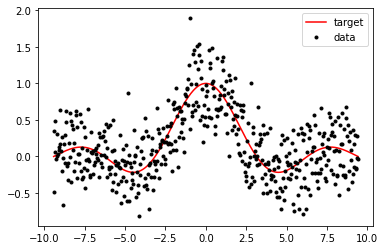

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500
X = np.linspace(-3*np.pi,3*np.pi,N)
y = np.sinc(X/np.pi)
var = 0.1
mue = 0
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])
yn = y + noise
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()

In [2]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right) 
\end{equation}

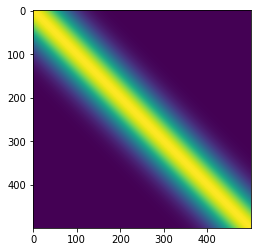

In [8]:
import tensorflow as tf
import tensorflow_probability as tfp


Xdatai = tf.convert_to_tensor(Xdata.reshape(Xdata.shape[0],-1),dtype=tf.float32)
ydatai = tf.convert_to_tensor(ydata.reshape(-1,1),dtype=tf.float32)

sigma = 2
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=sigma)
K = kernel.matrix(Xdatai,Xdatai)

plt.imshow(np.array(K))
plt.show()



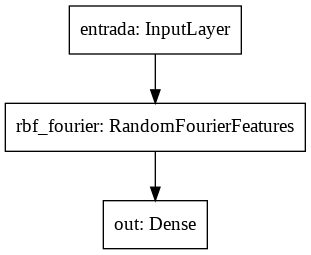

In [89]:
#arquitectura funcional
###HYPERPARAMETROS MAS IMPORTANTES######
scale = 2 #scaley = scale SC
Q = 20 #numero features kernel
###################################
lr = 1e-2
l1 = 1e-2
l2 = 1e-2

input_l = tf.keras.layers.Input(shape=(Xdatai.shape[1]), name='entrada')
h1 = tf.keras.layers.experimental.RandomFourierFeatures(output_dim=Q,
      scale=scale, kernel_initializer='gaussian',trainable= False,name='rbf_fourier')(input_l)
output = tf.keras.layers.Dense(1,activation='linear',name='out',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(h1)
model = tf.keras.Model(inputs=input_l,outputs=output)
#model.summary()
model.compile(loss='mse',#"sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              ) #f1, precision, re
tf.keras.utils.plot_model(model)

In [90]:
batch_size = 64
epochs = 200
validation_split = 0.2
history = model.fit(Xdatai, ydatai , epochs=epochs,batch_size=batch_size, # 32, 64, 128, 256
                    validation_split=validation_split)

Epoch 1/200
7/7 [==============================] - 0s 15ms/step - loss: 2.4348 - val_loss: 0.3351
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 1.1689 - val_loss: 0.2771
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 0.5074 - val_loss: 0.2898
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2693 - val_loss: 0.3515
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2170 - val_loss: 0.4041
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2035 - val_loss: 0.4074
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.1810 - val_loss: 0.3658
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.1591 - val_loss: 0.3210
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1523 - val_loss: 0.2951
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1517 - val_loss: 0.2990
Epoch 11/200
7/7 [==========

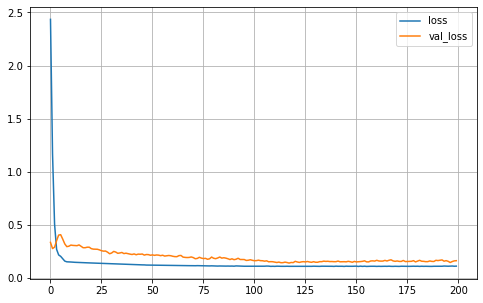

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

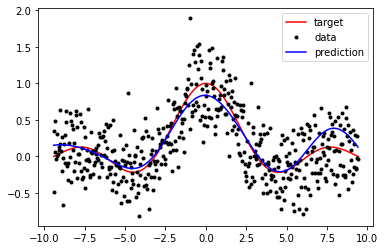

In [92]:
ye = model.predict(Xdatai)

plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.plot(X,ye,'b',label='prediction')
plt.legend()
plt.show()

# Kernel aproximado

In [93]:
model2 = tf.keras.Model(inputs=input_l,outputs=model.get_layer('rbf_fourier').output)

(500, 20)
(500, 500)


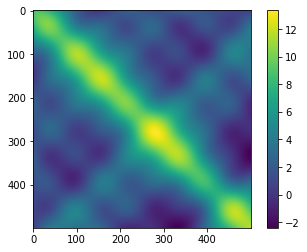

In [94]:
Ke = model2.predict(Xdatai)
print(Ke.shape)
Kef = Ke.dot(Ke.T)
print(Kef.shape)
plt.imshow(Kef)
plt.colorbar()
plt.show()
